## Nmap Network Scan Visualization In Python

---

##### Table of Contents

1. **Initial Setup**
   - **Import Libraries**: Import the necessary Python libraries for scanning and visualization.
   - **Initialize the Nmap Scanner**: Set up the Nmap scanner using the `nmap.PortScanner()` method.
   - **Define Target**: Specify the IP or hostname you want to scan.

2. **Port Scanning and Parsing**
   - **Perform Full Port Scan**: Scanning all ports (1-65535) using Nmap to check for open/closed ports on the target.
   - **Parse Results**: Extracting data from the Nmap scan output, including host, port, service name, and state (open/closed), and organizing it in a Pandas DataFrame.

3. **Service-Specific Visualization**
   - **Bar Chart of Open Ports by Service**: Visualizing the number of open ports for each service across the scanned hosts.

4. **Handling Unknown Services**
   - **Identify Known vs. Unknown Services**: Categorizing services as either known or unknown based on Nmap’s scan results.
   - **Visualize Known vs. Unknown Services**: Using a bar chart to compare the proportion of known and unknown services and their open/closed status.

5. **Scatter Plot (Lots of Dots) Bonus Visualization**
   - **Host-Wise Scatter Plot of Ports**: A scatter plot representing ports across hosts, with each dot indicating the state (open/closed) of a port.

6. **Heatmap of Open Ports Across Hosts**
   - **Matrix-Style Heatmap**: Showing the state of ports (open/closed) across all scanned hosts, with hosts on the y-axis and ports on the x-axis.

7. **Histogram of Port Frequencies**
   - **Port Frequency Distribution**: Showing the frequency of port numbers across all scanned hosts, helping to identify the most commonly used ports.


---

#### 1. Initial Setup
- First item Objective: Prepare the environment by importing necessary
- Libraries Used:
   - Nmap: For performing network scanning and extracting port and service data.
   - Pandas: For organizing the scan data into a DataFrame for easier manipulation and analysis.
   - Seaborn & Matplotlib: For creating visualizations of the scan data.
- Initialization: We initialize the Nmap scanner and set the target (IP or hostname) to scan.
python

In [1]:
# Prepare the environment by importing necessary libraries for scanning, data processing, and visualization.
import nmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Initialize the Nmap scanner
nm = nmap.PortScanner()

In [3]:
# Define the target (replace with the actual target IP or hostname)
target = '127.0.0.1'

---

#### 2. Port Scanning and Parsing
- Objective: Perform a comprehensive scan of the target’s network to collect data on open and closed ports, services, and their states (open/closed).
- Port Scanning:
  - We use an SYN scan (`-sS)`, which is a fast and stealthy scan method for determining the status of ports (open/closed).
  - The scan covers all 65535 ports (`-p 1-65535`) to ensure we gather complete data on the target.
- Parsing Results:
  - After the scan is complete, we loop through each host and port, extracting the service name, port number, and state (open/closed).
  - The parsed data is stored in a Pandas DataFrame for easier processing and visualization.

In [4]:
# 2. Port Scanning and Parsing
# Perform a full port scan with service detection
nm.scan(hosts=target, arguments='-sS -sV -p 1-65535')

# Parse scan results and capture service data
service_data = []
for host in nm.all_hosts():
    for port in nm[host]['tcp']:
        state = nm[host]['tcp'][port]['state']
        service_name = nm[host]['tcp'][port].get('name', 'unknown')  # Detect the service name
        version_info = nm[host]['tcp'][port].get('version', '')  # Capture version information if available
        service_data.append({
            'Host': host,
            'Port': port,
            'Service': service_name,
            'State': state,
            'Version': version_info  # Include version information in the data
        })

# Convert the service data into a Pandas DataFrame
df_services = pd.DataFrame(service_data)

# Display the DataFrame to check the results
print(df_services)




         Host   Port               Service     State          Version
0   127.0.0.1    135                 msrpc      open                 
1   127.0.0.1    137            netbios-ns  filtered                 
2   127.0.0.1    445          microsoft-ds      open                 
3   127.0.0.1    902           vmware-auth      open             1.10
4   127.0.0.1    912           vmware-auth      open              1.0
5   127.0.0.1   1434              ms-sql-s      open       16.00.1000
6   127.0.0.1   2382              ms-olap3      open                 
7   127.0.0.1   5040                            open                 
8   127.0.0.1   7680             pando-pub      open                 
9   127.0.0.1   8391                  http      open              2.0
10  127.0.0.1   8834         nessus-xmlrpc      open                 
11  127.0.0.1   9000                  zmtp      open                 
12  127.0.0.1   9001                  zmtp      open                 
13  127.0.0.1   9002

##### Breakdown:
1. Port Scanning (`-sS -sV`):

- `-sS`: Performs a SYN scan (fast and stealthy to detect open/closed ports).
- `-sV`: Performs service version detection, which attempts to identify the service running on each open port.
This scan checks all ports `(-p 1-65535)` on the specified target.

2. Parsing the Results:

- `nm.all_hosts()`: Retrieves all the hosts that were scanned.
- `nm[host]['tcp'][port]['state']`: Captures the state of each port (open/closed).
- `nm``[host]['tcp'][port].get('name'`, 'unknown'): Attempts to capture the service name; if the service is not identified, it defaults to `'unknown'`.
  `nm``[host]['tcp'][port].get('version'`, ''): Captures the version information (if available). This is important for more accurate detection of services.
  
1. Convert to DataFrame:

- All parsed results are stored in a Pandas `DataFrame`, making it easier to work with and visualize the data.
  
4. Handling Service Names and Versions:

- `Service`: Contains the service name (e.g., HTTP, SSH, etc.). If the service is unknown, it is labeled as `'unknown'`.
- `Version`: Captures additional version info for the service (e.g., HTTP version, SSH version, etc.), which can be useful for vulnerability assessments.
Additional Recommendations:

Why is this important?
- Scanning: A full SYN scan is useful to check for all open ports, helping identify potential entry points in the network.
- Parsing: We need to extract meaningful information from the scan output (service, port, state) so we can visualize and analyze it.

---

#### 3. Service-Specific Visualization
- Objective: Create a bar chart to show the number of open ports for each detected service (e.g., HTTP, SSH).
Logic:
  - Countplot: Seaborn’s `countplot()` is used to count how many ports are open for each service type, giving a clear view of the services running on the network.

C:\Users\rjvb6\AppData\Local\Temp\ipykernel_20680\2549130867.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_services[df_services['State'] == 'open'], x='Service', palette='Set2')


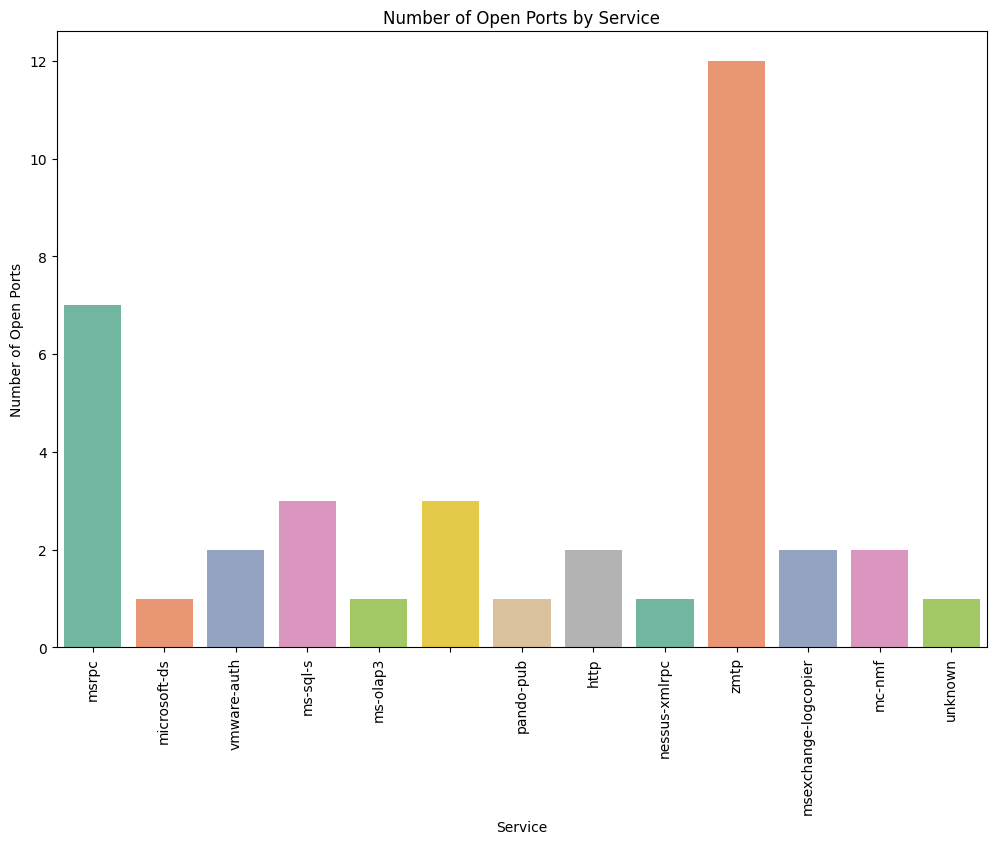

In [5]:
# 3. Service-Specific Visualization
if not df_services.empty:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df_services[df_services['State'] == 'open'], x='Service', palette='Set2')
    plt.title('Number of Open Ports by Service')
    plt.ylabel('Number of Open Ports')
    plt.xticks(rotation=90)
    plt.show()


In [6]:
# Check how many open ports exist for each service
df_services[df_services['State'] == 'open'].groupby('Service').size().sort_values(ascending=False)


Service
zmtp                    12
msrpc                    7
                         3
ms-sql-s                 3
http                     2
mc-nmf                   2
msexchange-logcopier     2
vmware-auth              2
microsoft-ds             1
ms-olap3                 1
nessus-xmlrpc            1
pando-pub                1
unknown                  1
dtype: int64

Why is this important?
- Visualization: This helps network administrators or security analysts identify which services have open ports, allowing for a quick assessment of network exposure.
- Data Focus: We only focus on open ports since they are the most relevant from a security perspective.


---

#### 4. Handling Unknown Services
- Objective: Identify which services are known and which are unknown, and visualize the open/closed status for both types.
- Logic:
  - Categorization: We categorize each service as "Known" (if recognized by Nmap) or "Unknown" (if Nmap couldn’t identify the service running on a port).
  - Visualization: A bar chart shows the proportion of known vs unknown services, further broken down by whether they are open or closed.

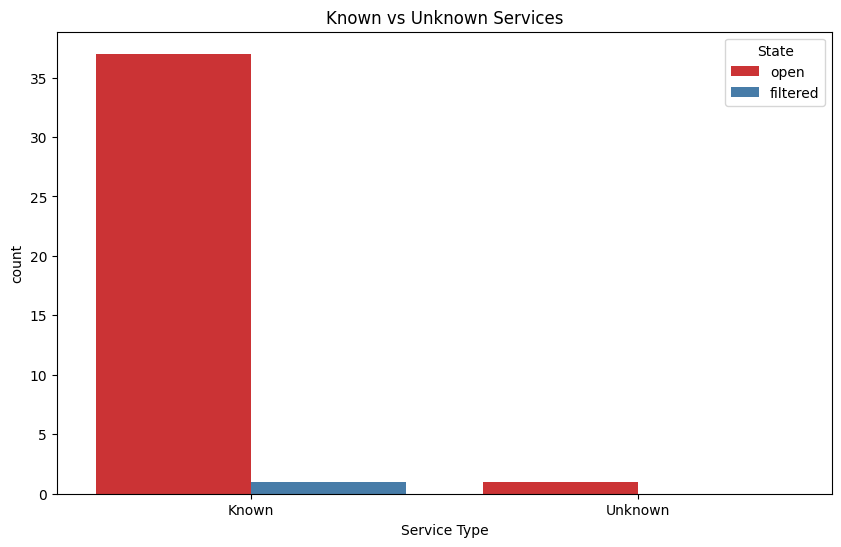

In [7]:
# 4. Handling Unknown Services
# Categorize known vs unknown services
df_services['Service Type'] = df_services['Service'].apply(lambda x: 'Known' if x != 'unknown' else 'Unknown')

# Visualize known vs unknown services
plt.figure(figsize=(10, 6))
sns.countplot(data=df_services, x='Service Type', hue='State', palette='Set1')
plt.title('Known vs Unknown Services')
plt.show()


Why is this important?
- Security Implications: Unknown services could represent misconfigured services, custom services, or hidden vulnerabilities.
- Focus: Differentiating known from unknown services helps focus security efforts on unfamiliar or potentially risky services.

---

#### 5. Scatter Plot (Lots of Dots) Bonus Visualization
- Objective: Visualize the distribution of ports across hosts, color-coded by whether the port is open or closed.
- Logic:
  - Scatter Plot: Each dot represents a port on a host, giving a host-wise breakdown of open/closed ports.
  - The x-axis represents port numbers and the y-axis represents hosts, making it easy to spot patterns in port availability.

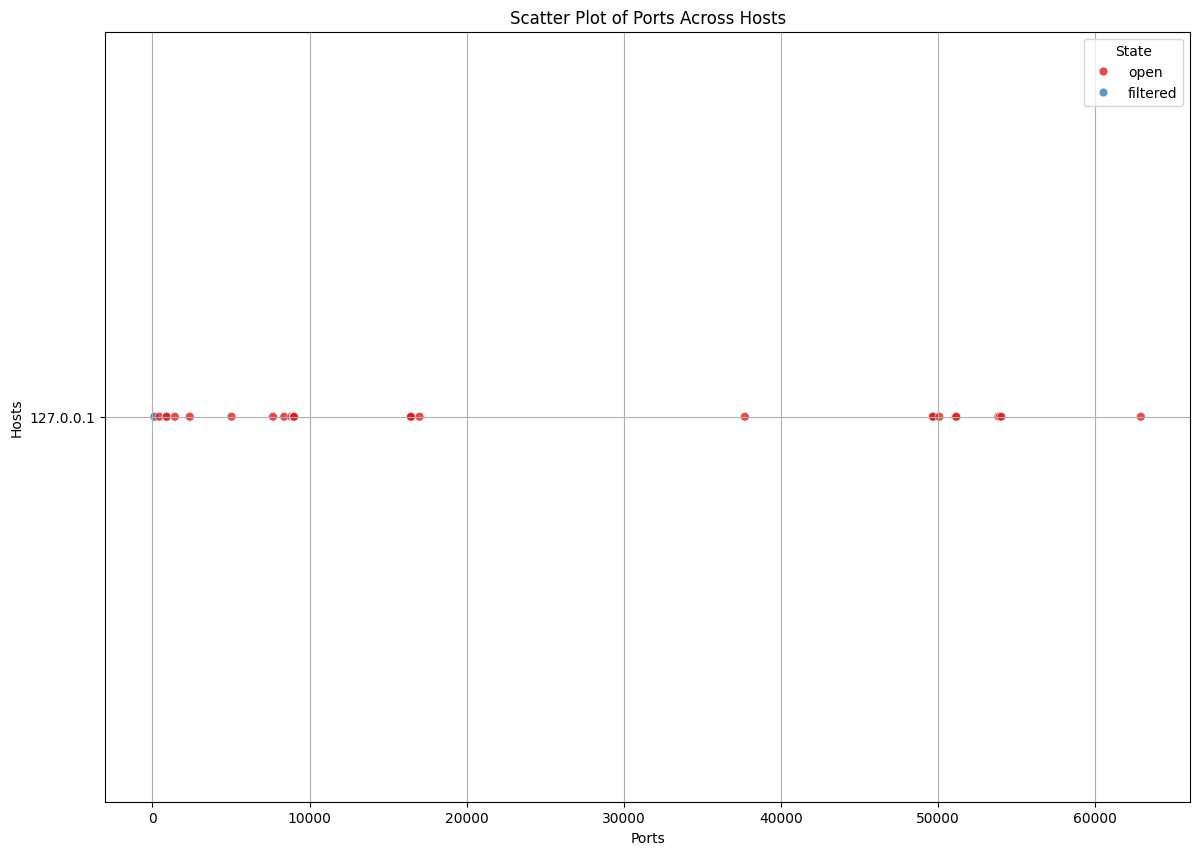

In [8]:
# 5. Scatter Plot (Lots of Dots) Bonus Visualization
df_services['State Numeric'] = df_services['State'].apply(lambda x: 1 if x == 'open' else 0)

plt.figure(figsize=(14, 10))
sns.scatterplot(data=df_services, x='Port', y='Host', hue='State', palette='Set1', s=40, alpha=0.8)
plt.title('Scatter Plot of Ports Across Hosts')
plt.xlabel('Ports')
plt.ylabel('Hosts')
plt.grid(True)
plt.show()


Why is this important?
- Detailed View: Scatter plots give a dense visual representation of which ports are open or closed across different hosts, allowing security analysts to identify patterns (e.g., repeated use of the same port across hosts).

---

#### 6. Heatmap of Open Ports Across Hosts
- Objective: Create a heatmap to represent the state of ports across multiple hosts.
- Logic:
    - We use a pivot table to rearrange the data with hosts on the y-axis and ports on the x-axis. The heatmap color intensity reflects whether the port is open or closed.

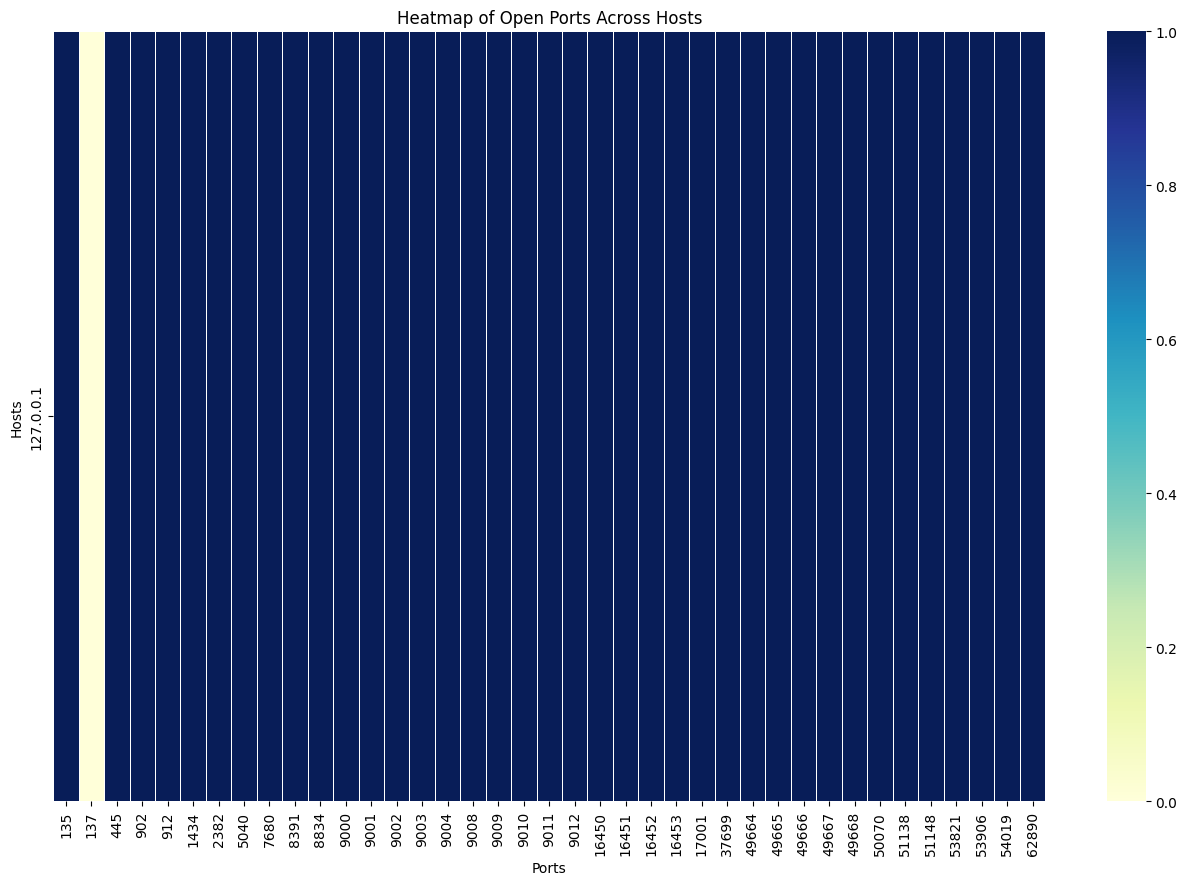

In [9]:
# 6. Heatmap of Open Ports Across Hosts
heatmap_data = df_services.pivot_table(index='Host', columns='Port', values='State Numeric', aggfunc='first').fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Open Ports Across Hosts')
plt.ylabel('Hosts')
plt.xlabel('Ports')
plt.show()


Why is this important?
- Network Overview: A heatmap provides a clear and quick way to visualize the status of a large number of ports across multiple hosts.
- Port Distribution: Helps in identifying unusual patterns (e.g., the same port being open across several hosts, which may indicate a vulnerability).

---

#### 7. Histogram of Port Frequencies
- Objective: Visualize the frequency of port numbers across all scanned hosts.
- Logic:
  - A histogram is used to show how many times each port appears in the scan results. This helps identify the most commonly used ports in the network.

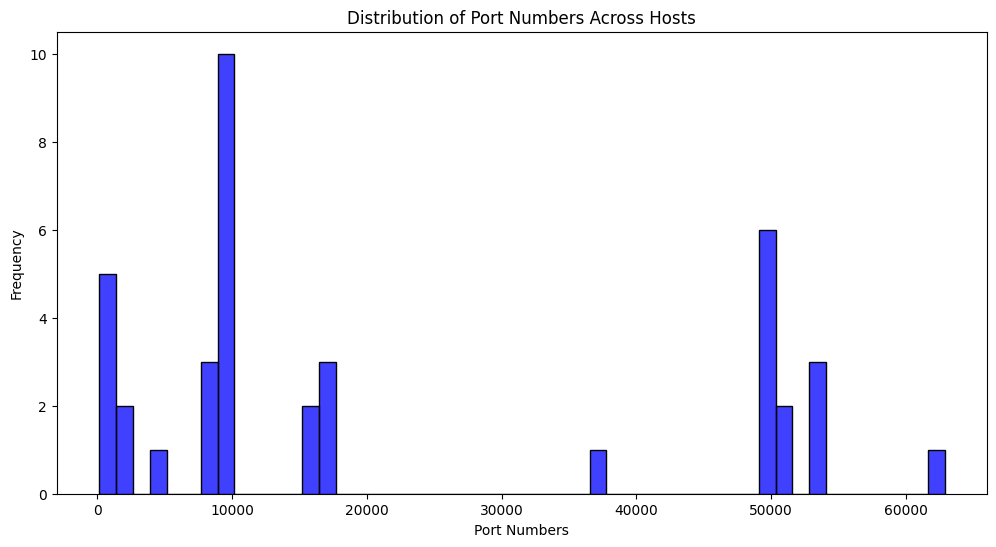

In [10]:
# 7. Histogram of Port Frequencies
plt.figure(figsize=(12, 6))
sns.histplot(df_services['Port'], bins=50, color='blue')
plt.title('Distribution of Port Numbers Across Hosts')
plt.xlabel('Port Numbers')
plt.ylabel('Frequency')
plt.show()


#### Why is this important?
- Common Ports: Identifying commonly used ports can help focus security audits on frequently exposed ports.
- Port Usage: It gives insight into the range of port numbers being used and helps spot trends (e.g., use of high-numbered ports).


---

#### Summary:
Each step in this project provides a structured approach to network scanning and data visualization:

1. Initial Setup prepares the environment.
2. Port Scanning and Parsing gathers data about the network.
3. Service-Specific Visualization focuses on services with open ports.
4. Handling Unknown Services highlights potentially risky unknown services.
5. Scatter Plot and Heatmap give different visual perspectives of the scanned data.
6. Histogram shows how frequently each port is used across hosts.
Let me know if you need further modifications or explanations!

---

---
**Author**: Rich Van Buren  
**Date**: September 2024  
**Project**: Network Scanning & Visualization with Nmap  
**Contact**:  
- Email: [rvanburen.tech@gmail.com](mailto:rvanburen.tech@gmail.com)  
- GitHub: [github.com/Ulfvaldr](https://github.com/Ulfvaldr)
- LinkedIn: [www.linkedin.com/in/rich-van-buren-4762955](https://linkedin.com/in/yourprofile)
---
